In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
len(x_train)


60000

In [20]:
x_train[0].shape

(28, 28)

In [21]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

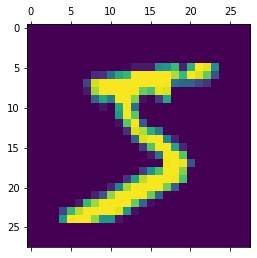

In [22]:
plt.matshow(x_train[0])

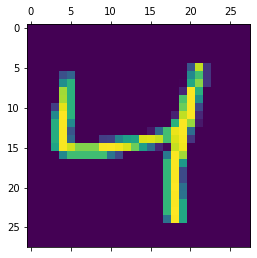

In [23]:
plt.matshow(x_train[2])

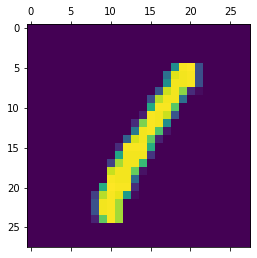

In [24]:
plt.matshow(x_train[3])

In [25]:
y_train[2]

4

In [26]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
#Scaled from 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [29]:
# Now Flattened image by (60000,784)
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [30]:
x_train_flattend[0]

NameError: name 'x_train_flattend' is not defined

In [31]:
# Simple Neural Network which contains only input layer(784) and a output layer(10)
model = keras.Sequential([                                     #means having a stack of layers in my NN
	keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid")                                 #means each neuron is connected with every neuron od second layer   
]) 

model.compile(
    optimizer = 'adam',                              #optimizer allows you to train efficiently 
	loss = 'SparseCategoricalCrossentropy',
    metrics = ["accuracy"]
)

model.fit(x_train_flattened, y_train, epochs=5)           #epochs is a number of iterations our NN will run for training                                          #where the actual training happens

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4712 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9253


In [32]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9240


[0.26733896136283875, 0.9240000247955322]

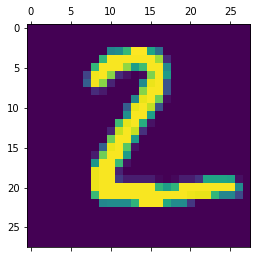

In [33]:
plt.matshow(x_test[1])

In [34]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([3.6097327e-01, 2.8679073e-03, 9.9902290e-01, 2.5098133e-01,
       5.0596177e-10, 8.4089160e-01, 8.3666903e-01, 1.2240619e-12,
       1.0855326e-01, 1.8435721e-09], dtype=float32)

In [35]:
np.argmax(y_predicted[1])

2

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [37]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [38]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   9,    9,  916,   21,    8,    3,   13,   12,   37,    4],
       [   3,    0,   17,  930,    0,   18,    2,   13,   19,    8],
       [   2,    1,    3,    2,  907,    0,   10,    4,   10,   43],
       [  10,    1,    2,   41,    9,  767,   18,    7,   29,    8],
       [  15,    3,    6,    1,    7,   10,  913,    2,    1,    0],
       [   1,    5,   22,    4,    6,    0,    0,  956,    2,   32],
       [   7,    7,    6,   26,    9,   28,    8,   14,  861,    8],
       [  11,    7,    1,   12,   23,    5,    0,   30,    4,  916]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

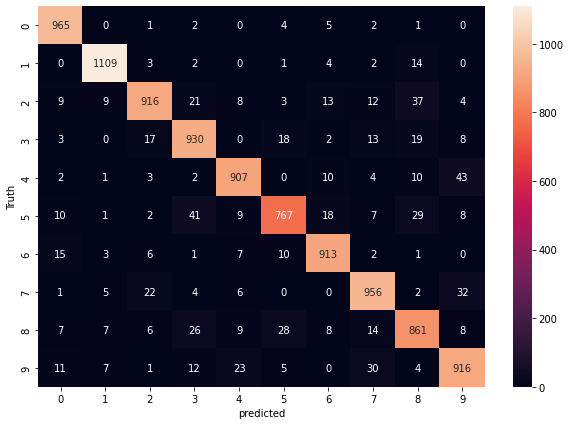

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [40]:
# Neural Network with hidden layers
model = keras.Sequential([                                     #means having a stack of layers in my NN
	keras.layers.Dense(100, input_shape=(784,), activation = "relu"),                                 #means each neuron is connected with every neuron od second layer   
	keras.layers.Dense(10, activation = "sigmoid")
]) 

model.compile(
    optimizer = 'adam',                              #optimizer allows you to train efficiently 
	loss = 'SparseCategoricalCrossentropy',
    metrics = ["accuracy"]
)

model.fit(x_train_flattened, y_train, epochs=5)           #epochs is a number of iterations our NN will run for training                                          #where the actual training happens

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2765 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9845


In [41]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9745


[0.08318191766738892, 0.9745000004768372]

Text(69.0, 0.5, 'Truth')

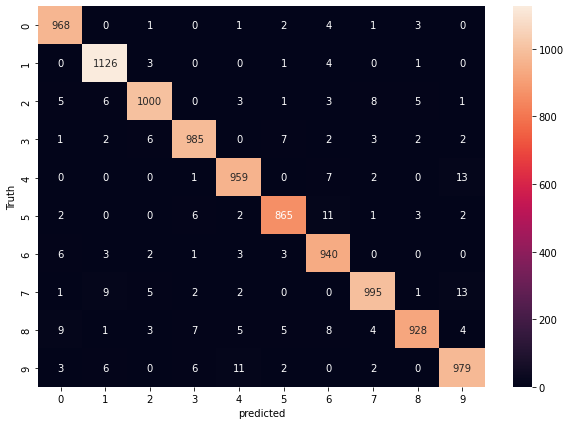

In [42]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [43]:
# Neural Network with hidden layers and keras's flattened func
model = keras.Sequential([                                     #means having a stack of layers in my NN
	keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation = "relu"),                                 #means each neuron is connected with every neuron od second layer   
	keras.layers.Dense(10, activation = "sigmoid")
]) 

model.compile(
    optimizer = 'adam',                              #optimizer allows you to train efficiently 
	loss = 'SparseCategoricalCrossentropy',
    metrics = ["accuracy"]
)

model.fit(x_train, y_train, epochs=5)           #epochs is a number of iterations our NN will run for training                                          #where the actual training happens

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2671 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1226 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - accuracy: 0.9837


In [49]:
model = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.Maxpooling2D((2,2)),
    
    #layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28)),
    #layers.Maxpooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

AttributeError: module 'keras.api._v2.keras.layers' has no attribute 'Maxpooling2D'